
# Thursday Morning Session
## Single-Cell RNAseq 
## Scanpy preprocessing, clustering, visualization


In [5]:
import scanpy as sc

In [6]:
adata = sc.read_h5ad("bone_marrow_mononuc_luecken.h5ad")

In [7]:
type(adata.obs)

pandas.core.frame.DataFrame

In [8]:
adata.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC141272.1
AC023491.2
AC007325.1
AC007325.4


In [9]:
adata.X[:100,:100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Preprocessing/QC

In [10]:
# find out mt and rb gene expression -- filter cells based on this info
# can take a panda series (or index) and do .str so you can use string functions on these entries
# can do startswith() on string list to get our mitochondrial genes

adata.var["mt"] = adata.var.index.str.startswith("MT-")


In [11]:
# new column which tells us if the gene name is mitochondrial (true/false)
adata.var

,mt
MIR1302-2HG,False
FAM138A,False
OR4F5,False
AL627309.1,False
AL627309.3,False
...,...
AC141272.1,False
AC023491.2,False
AC007325.1,False
AC007325.4,False


In [12]:
# can see the mt genes
adata.var[adata.var["mt"]]


,mt
MT-ND1,True
MT-ND2,True
MT-CO1,True
MT-CO2,True
MT-ATP8,True
MT-ATP6,True
MT-CO3,True
MT-ND3,True
MT-ND4L,True
MT-ND4,True


In [13]:
# we can do the same for ribosomal genes
adata.var["ribo"] = adata.var.index.str.startswith(("RPS", "RPL"))
# can add other gene names to ribo


In [14]:
# now we have a second column with the ribosomal data
adata.var

,mt,ribo
MIR1302-2HG,False,False
FAM138A,False,False
OR4F5,False,False
AL627309.1,False,False
AL627309.3,False,False
...,...,...
AC141272.1,False,False
AC023491.2,False,False
AC007325.1,False,False
AC007325.4,False,False


In [15]:
#103 ribosomal genes
adata.var[adata.var["ribo"]]

,mt,ribo
RPL22,False,True
RPL11,False,True
RPS6KA1,False,True
RPS8,False,True
RPL5,False,True
...,...,...
RPL36A,False,True
RPL39,False,True
RPL10,False,True
RPS4Y1,False,True


In [16]:
# we are looking for specifying patterns in a string
# the ^ tells python to look at the beginning of the string
# look for capital HB, then we say the next character is not P. Carrot in brackets [^] means not
# can use https://regex101.com/ to test your expression and string output

adata.var["hb"] = adata.var.index.str.contains(r"^HB[^(P)]")

Can use https://regex101.com/ to test your expression and string output

input: ^HB[^(P)]

test string:
HBABC
HBPABC
HB123
HB456

Click python, and look at output to see which strings are highlighted

In [17]:
# now we can look at the output
adata.var

,mt,ribo,hb
MIR1302-2HG,False,False,False
FAM138A,False,False,False
OR4F5,False,False,False
AL627309.1,False,False,False
AL627309.3,False,False,False
...,...,...,...
AC141272.1,False,False,False
AC023491.2,False,False,False
AC007325.1,False,False,False
AC007325.4,False,False,False


In [18]:
adata.var[adata.var["hb"]]

,mt,ribo,hb
HBEGF,False,False,True
HBS1L,False,False,True
HBB,False,False,True
HBD,False,False,True
HBG1,False,False,True
HBG2,False,False,True
HBE1,False,False,True
HBZ,False,False,True
HBM,False,False,True
HBA2,False,False,True


In [19]:
# preprocessing module is sc.pp
# first qc metrics: specify data, then specify the variables for qc
# log1p tells scanpy to compute QC metrics that rely on log transformed data as well

sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"],
                           inplace=True, log1p=True)

In [20]:
# get many columns with QC data for each cell
adata

AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [21]:
adata.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,6.133398,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,7.490530,13.926710,1719.0,7.450079,13.374310,58.0,4.077538,0.451257
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,6.366470,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,6.660575,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,5.075174,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGAGTCTGG-1,s1d3,277,5.627621,615.0,6.423247,63.089431,71.219512,87.479675,100.000000,282.0,5.645447,45.853661,35.0,3.583519,5.691057,20.0,3.044523,3.252032
TTTGTTGCAGACAATA-1,s1d3,3797,8.242230,13218.0,9.489410,30.753518,44.628537,53.691935,64.684521,864.0,6.762730,6.536541,3997.0,8.293550,30.239067,42.0,3.761200,0.317749
TTTGTTGCATGTTACG-1,s1d3,3089,8.035926,27280.0,10.213945,64.409824,71.671554,78.317449,85.054985,1025.0,6.933423,3.757332,3562.0,8.178358,13.057184,13145.0,9.483872,48.185482
TTTGTTGGTAGTCACT-1,s1d3,379,5.940171,698.0,6.549651,52.865330,60.028653,74.355301,100.000000,143.0,4.969813,20.487106,58.0,4.077538,8.309455,39.0,3.688879,5.587393


In [22]:
# can also look at X, which is still sparse matrix
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26550469 stored elements and shape (17125, 36601)>

In [23]:
# still looks the same as before preprocessing
adata.X[:100, :100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

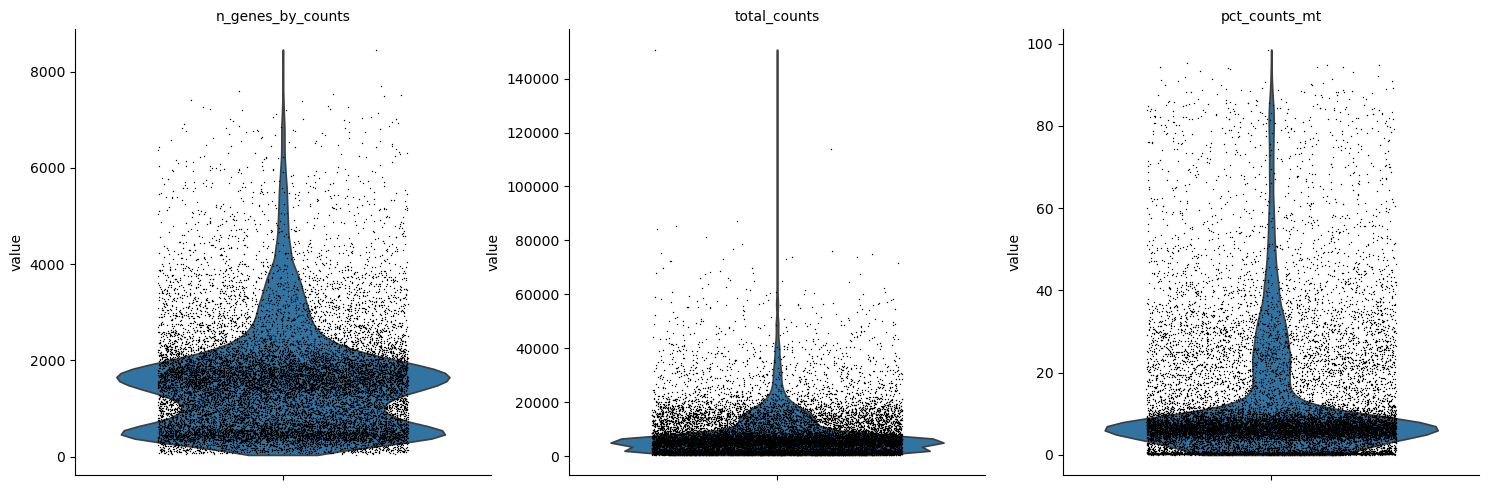

In [24]:
# a way to visualize some of these QC values
# sc.pl brings you to plotting
# this can show the 
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
             jitter=0.3,
             multi_panel=True)

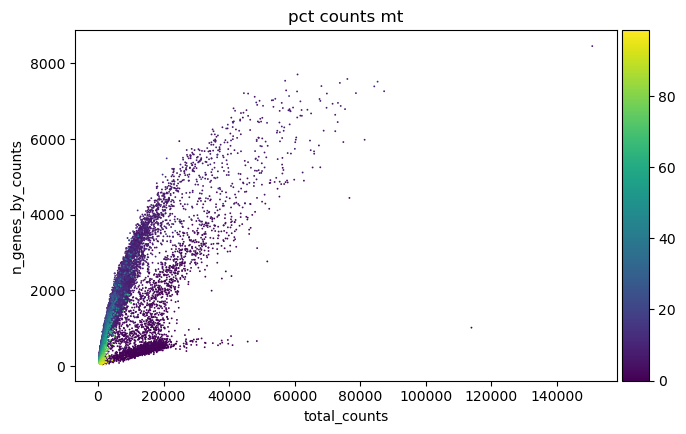

In [25]:
# another visualization is scatterplot 
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts",
              color="pct_counts_mt")

In [26]:
# we can do some simple filtering
# use sc.pp for preprocessing
# filter cells if fewer than 100 genes is expressed, remove them

sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [27]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [28]:
# this adata frame has the counts stored in the .X 
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26539065 stored elements and shape (17041, 23427)>

In [29]:
# we're going to normalize the counts
# since the data is small, we can keep the original counts and the normalized counts as separate objects in a layer
# which is great! and not feasible with larger datasets
# we're putting the raw counts into this slot of the layers object

adata.layers["counts"] = adata.X.copy()

In [30]:
# this is how we can access the raw counts
adata.layers["counts"]

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26539065 stored elements and shape (17041, 23427)>

In [31]:
# now we can normalize the counts (the ones in X -- we'll keep the "counts" layer untouched)
# for each cell, the total number of counts is 10,000 making it easier to compare between cells
# last line is operating in place on adata

sc.pp.normalize_total(adata, target_sum=10000)
sc.pp.log1p(adata)

In [32]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [33]:
# still sparse, which is important
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26539065 stored elements and shape (17041, 23427)>

In [34]:
# look at nonzero entries in sparse matrix for X after we transformed it
adata.X.data

array([1.495822  , 0.76748186, 0.76748186, ..., 2.2144756 , 0.858422  ,
       4.1934786 ], dtype=float32)

In [35]:
# the raw counts are integer data, while the transformed no longer is, showing the transformation changes
adata.layers["counts"].data

array([ 3.,  1.,  1., ...,  6.,  1., 48.], dtype=float32)

In [36]:
# note that our data comes from 2 samples (s1d1 and s1d3)
adata.obs["sample"].value_counts()

sample
s1d1    8713
s1d3    8328
Name: count, dtype: int64

In [37]:
# look for doublets and remove them
# scrublet detects doublets in scRNAseq
# error -- no module named skimage 
# need to install on command line with $ conda install scikit-image
# then restart, and run all
# this changed the numpy version from 2.0.1 to 1.26.4, see code below to check version
# to upgrade again later, $ conda install numpy=[version]

# upgraded numpy to 2.1
# # error with scrublet depending on numpy version
#sc.pp.scrublet(adata, batch_key="sample")

In [38]:
import numpy as np
np.__version__

'2.1.3'

In [39]:
# two new columns added, doublet score and predicted doublet (false = low score, not a doublet)
adata.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,6.133398,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237,2103
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,7.490530,13.926710,1719.0,7.450079,13.374310,58.0,4.077538,0.451257,3916
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,6.366470,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057,683
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,6.660575,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675,4330
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,5.075174,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGAGTCTGG-1,s1d3,277,5.627621,615.0,6.423247,63.089431,71.219512,87.479675,100.000000,282.0,5.645447,45.853661,35.0,3.583519,5.691057,20.0,3.044523,3.252032,277
TTTGTTGCAGACAATA-1,s1d3,3797,8.242230,13218.0,9.489410,30.753518,44.628537,53.691935,64.684521,864.0,6.762730,6.536541,3997.0,8.293550,30.239067,42.0,3.761200,0.317749,3797
TTTGTTGCATGTTACG-1,s1d3,3089,8.035926,27280.0,10.213945,64.409824,71.671554,78.317449,85.054985,1025.0,6.933423,3.757332,3562.0,8.178358,13.057184,13145.0,9.483872,48.185482,3089
TTTGTTGGTAGTCACT-1,s1d3,379,5.940171,698.0,6.549651,52.865330,60.028653,74.355301,100.000000,143.0,4.969813,20.487106,58.0,4.077538,8.309455,39.0,3.688879,5.587393,379


In [40]:
# can inspect the doublet score with a histogram to take a look at the distribution
import matplotlib.pyplot as plt

In [41]:
#plt.hist(adata.obs["doublet_score"])
# error with scrublet depending on numpy version

In [42]:
# defining the top 2000 highly variable genes and including the 2 samples as batches 
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

In [43]:
# can see highly_variable column has true/false, and 6 other columns from this including nbatches and intersection
adata.var

,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
AL627309.1,False,False,False,40,0.002336,0.002333,99.766423,40.0,3.713572,40,False,0.003879,1.068160,-0.135804,0,False
AL627309.3,False,False,False,3,0.000175,0.000175,99.982482,3.0,1.386294,3,False,0.000294,0.720639,-0.706037,0,False
AL627309.5,False,False,False,155,0.009460,0.009415,99.094891,162.0,5.093750,155,False,0.018172,1.430467,0.457930,0,False
AL627309.4,False,False,False,7,0.000409,0.000409,99.959124,7.0,2.079442,7,False,0.000739,0.791405,-0.591345,0,False
AP006222.2,False,False,False,3,0.000234,0.000234,99.982482,4.0,1.609438,3,False,0.000288,0.324107,-1.352641,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004556.3,False,False,False,827,0.063358,0.061432,95.170803,1085.0,6.990256,827,False,0.053558,0.406094,-0.314774,0,False
AC233755.2,False,False,False,10,0.000818,0.000817,99.941606,14.0,2.708050,10,False,0.001516,1.039704,-0.185250,0,False
AC233755.1,False,False,False,45,0.004613,0.004603,99.737226,79.0,4.382027,45,False,0.005400,0.906056,-0.400830,0,False
AC141272.1,False,False,False,3,0.000175,0.000175,99.982482,3.0,1.386294,3,False,0.000118,-0.392364,-2.534376,0,False


In [44]:
# run pca after finding highly variable genes
# tl stands for tool, pca is one of these tools in sc
sc.tl.pca(adata, use_highly_variable=True)

/root/miniconda3/envs/bootcamp/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [45]:
# we now have obsm and varm -- the m means matrix
# so creating a variable with a matrix output will be stored in obsm or varm
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [46]:
# pca projection per cell is in obsm -- 50 pc per cell

adata.obsm["X_pca"].shape

(17041, 50)

In [47]:
# now we can plot the first two pcs per cell
# error with scrublet depending on numpy version

#sc.pl.embedding(adata, basis="pca", color="doublet_score")

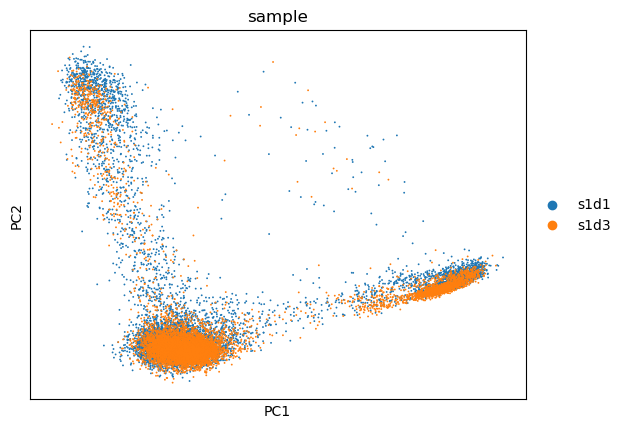

In [48]:
# now we can plot the first two pcs per cell
# can color by sample -- see good overlap, doesn't seem to be a large batch effect from this

sc.pl.embedding(adata, basis="pca", color="sample")

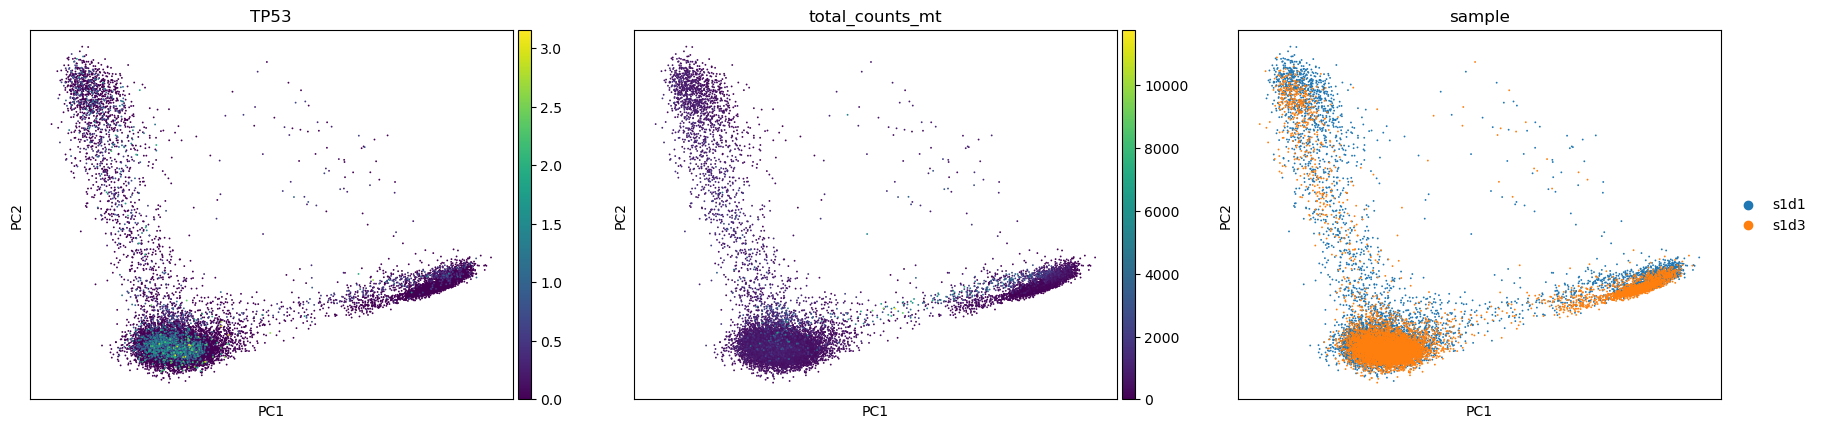

In [49]:
# can quickly look at marker genes of interest in a list and easily see if any cells stand out with those markers
# a quick way to get a lot of information from your data
sc.pl.embedding(adata, basis="pca", color=["TP53", "total_counts_mt", "sample"])

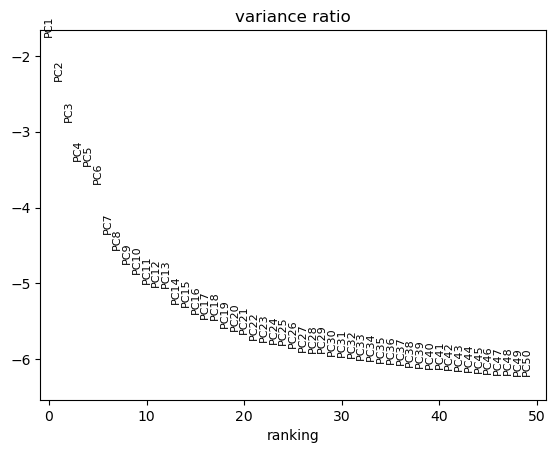

In [50]:
# explained variance plot
# principal component to explain variance in the data -- a way to compress your data
# first pc explains the most variance in your data, second "perpendicular" trying to explain as much of variance as possible
# always the case that pc1 explains more than the others (they're sorted)
# pcs are derived from the covariance matrix -- picking up linear/Gaussian effects
# point of this plot is not QC for your data, but tells you if pc1 and pc2 are showing most of the "full picture" or if other variance can be explained with other pcs
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

In [51]:
# run algorithm that finds which cells are close to each other in pc space
# neighbors in preprocessing module
# by default, looks at 15 neighbors closest to it, also uses pca by default
sc.pp.neighbors(adata)

/root/miniconda3/envs/bootcamp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [52]:
# another attribute in object data -- obsp with 2 slots, the distances between cells and the connectivites
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'sample_colors', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [53]:
# we have nearest neighbors and everything we need to run umap
# umap is a tool in scanpy
# can only run it with the connectivities and distances from neighbors, need that for umap

sc.tl.umap(adata)

In [54]:
# see umap is added to uns in adata (uns is unstructured -- it contains arbitrarily structured info, and keeps a log of the tools run on the data)
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'sample_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

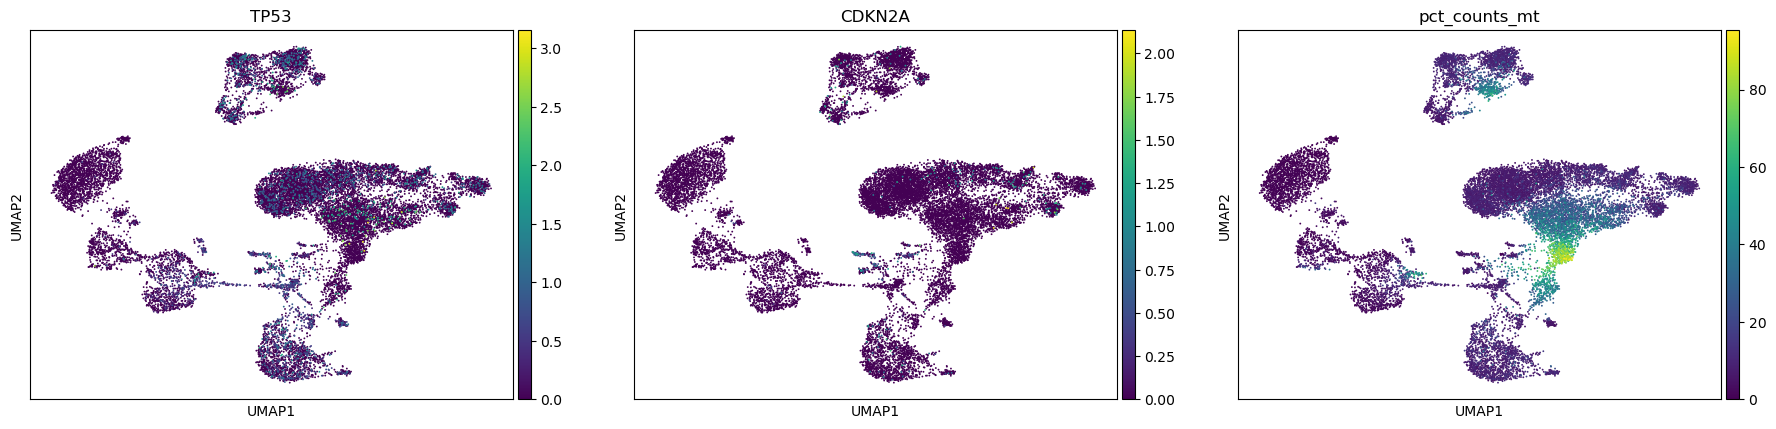

In [55]:
# make plots, can include list again of genes and variables
sc.pl.embedding(adata, basis="umap", color=["TP53", "CDKN2A", "pct_counts_mt"])

In [56]:
# look at highly variable genes to look at top 5 on umap
top_variable_genes = adata.var[adata.var["highly_variable"]].sort_values("dispersions", ascending=False).index[:5]

In [57]:
# look at highly variable genes to look at top ones on umap
top_variable_genes

Index(['HBB', 'IGKC', 'IGLC3', 'HBA2', 'IGLC2'], dtype='object')

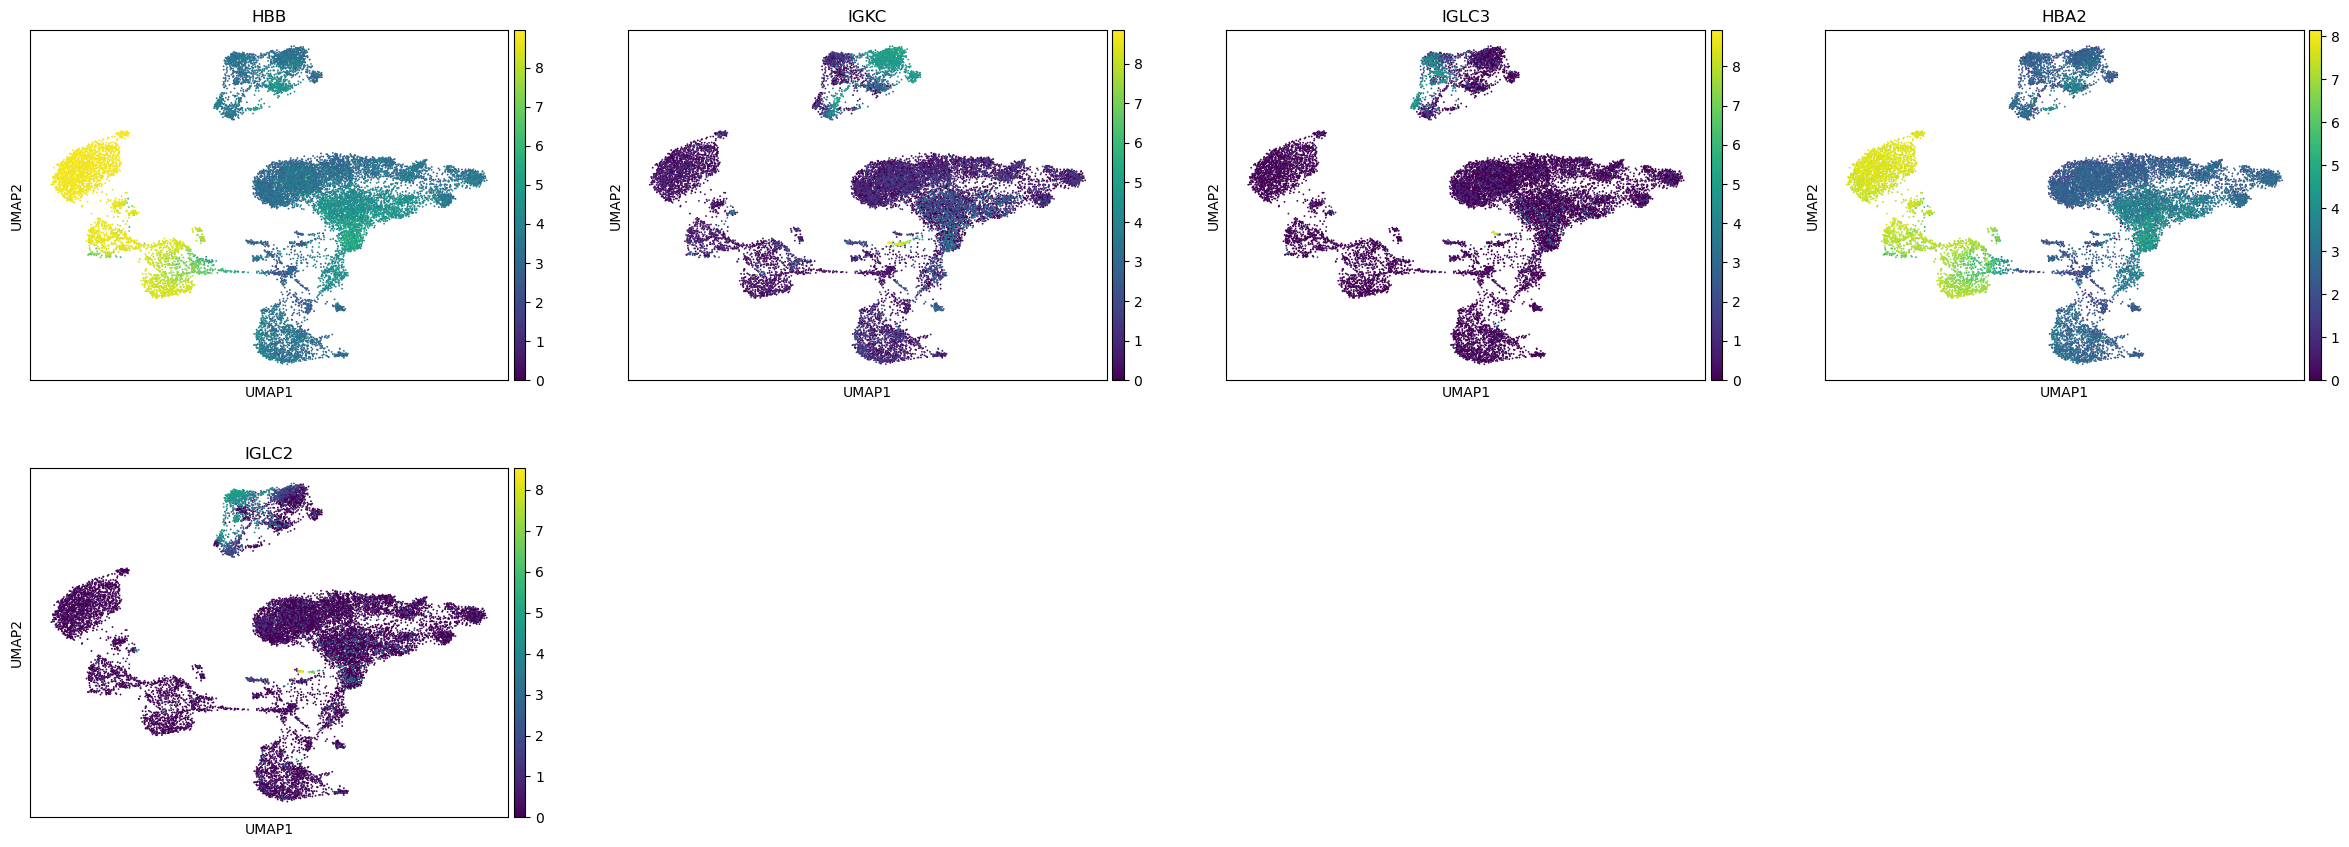

In [58]:
sc.pl.embedding(adata, basis="umap", color=top_variable_genes)

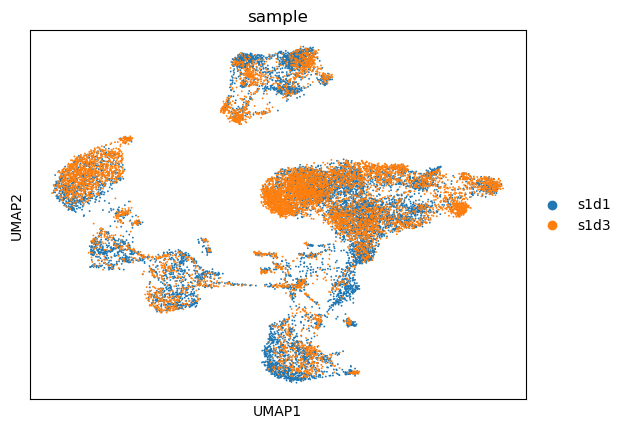

In [59]:
# doesn't appear to have a batch affect based on samples here
sc.pl.embedding(adata, basis="umap", color="sample")

In [60]:
# do some clustering (leiden clustering)
# making 2 columns, one for each resolution
# had to update numpy to version 2.1 (conda install numpy=2.1)
# had to uninstall packages (conda uninstall scanpy python-igraph leidenalg)
# reinstalled packages (pip install 'scanpy[leiden]')
# restarted and ran all, and the below code worked
resolution = [1.0, 2.0]
for res in resolution:
    sc.tl.leiden(adata, resolution=res, key_added=f"leiden_{res}")

/tmp/ipykernel_29570/4138213843.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=res, key_added=f"leiden_{res}")


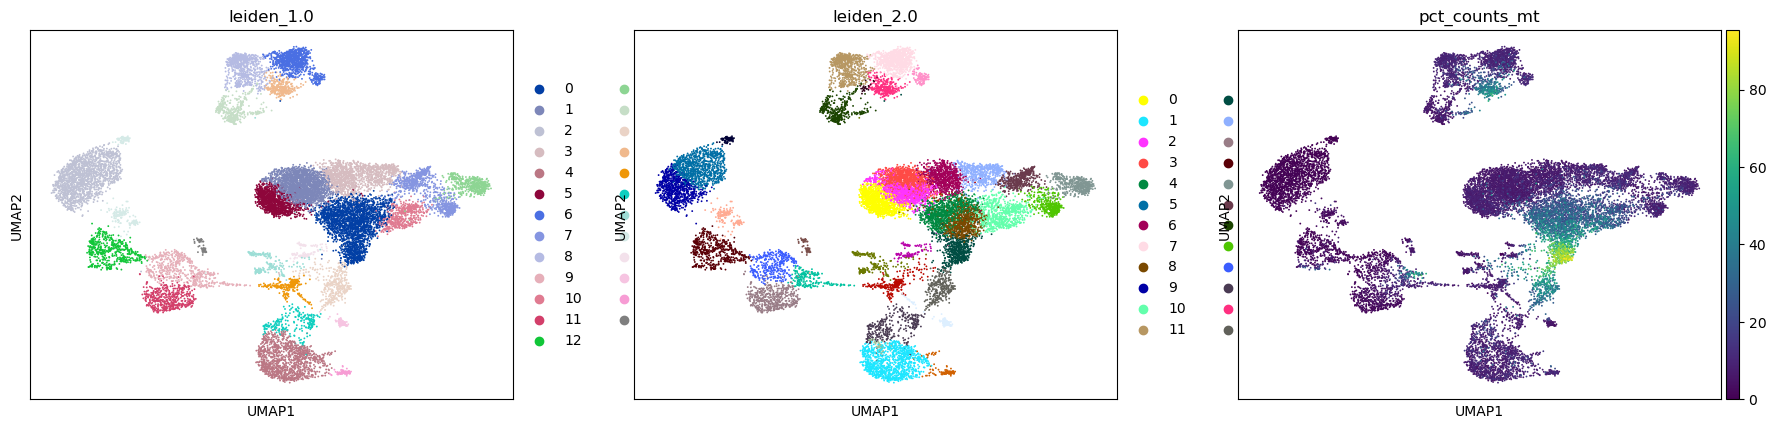

In [61]:
sc.pl.embedding(adata, basis="umap", color=["leiden_1.0", "leiden_2.0", "pct_counts_mt"])

In [62]:
# this shows the clusters within each leiden resolution in two columns added to adata.obs
adata.obs.loc[adata.obs["pct_counts_mt"].sort_values(ascending=False).index, :]

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,leiden_1.0,leiden_2.0
GAAATGAGTGACCGTC-1,s1d1,100,4.615121,2631.0,7.875499,98.099582,100.000000,100.000000,100.0,2510.0,...,95.400986,17.0,2.890372,0.646142,14.0,2.708050,0.532117,100,0,12
GGGAAGTTCATAGACC-1,s1d1,105,4.663439,2352.0,7.763446,97.661565,99.787415,100.000000,100.0,2217.0,...,94.260201,23.0,3.178054,0.977891,9.0,2.302585,0.382653,105,0,12
ACACCAACAGTTACCA-1,s1d1,151,5.023881,4333.0,8.374247,97.669051,98.822986,100.000000,100.0,4082.0,...,94.207245,28.0,3.367296,0.646204,10.0,2.397895,0.230787,151,0,12
GTAACACGTACTGTTG-1,s1d3,111,4.718499,2101.0,7.650645,97.096621,99.476440,100.000000,100.0,1960.0,...,93.288910,40.0,3.713572,1.903855,7.0,2.079442,0.333175,111,0,12
AGTGTTGTCTCGCGTT-1,s1d1,102,4.634729,1623.0,7.392648,96.796057,99.876771,100.000000,100.0,1512.0,...,93.160812,29.0,3.401197,1.786815,12.0,2.564949,0.739372,102,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACTACGACACTTGACA-1,s1d3,187,5.236442,3977.0,8.288534,96.555192,97.812421,100.000000,100.0,1.0,...,0.025145,44.0,3.806663,1.106362,3694.0,8.214736,92.884079,187,20,32
CTGGTCTAGAATCGTA-1,s1d1,142,4.962845,4379.0,8.384804,97.899064,99.040877,100.000000,100.0,1.0,...,0.022836,21.0,3.091043,0.479562,4174.0,8.336869,95.318565,142,20,32
GACCTTCGTCCATACA-1,s1d3,191,5.257495,5062.0,8.529715,97.214540,98.202292,100.000000,100.0,1.0,...,0.019755,39.0,3.688879,0.770446,4798.0,8.476163,94.784668,191,20,32
TCTACCGAGCTCGCAC-1,s1d3,220,5.398163,11370.0,9.338821,98.302551,98.944591,99.824099,100.0,2.0,...,0.017590,51.0,3.951244,0.448549,10959.0,9.302008,96.385223,220,20,32


### Using umaps, Leiden and harmony
The leiden clustering uses the neighbors information that umap does. The clusters from the leiden algorithm agree with what you expect from the umap. The neighbors are based on distance in pca space.

What harmony is, is a version of pca that accounts for batches. So one typically runs pca first, then uses harmony to adjust the embedding such that the different batches agree with each other.

The way umap works: points that are close together in the umap space are close together in the original space. But relative distances are not very meaningful. In leiden clustering, some clusters look physically distant, but that is not preserved in umap -- so the physical distance on the map is not as indicative of cluster distances between each other. 

You should never do analysis on umap outputs -- don't take umap coordinates and do stats on those. Relative distances on umap are not that informative. The leiden algorithm uses the distances between cells in pca space to identify clusters.

understanding umap:
https://pair-code.github.io/understanding-umap/

neighbors tells you how strictly it will follow a vluster

the second figure come from nemnes
faschion MNIST 

https://duhaime.s3.amazonaws.com/apps/umap-zoo/index.html
